In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the data
data=pd.read_csv('synthetic_dataset_10000x20.csv')
data.head()

customer_id  age   income  savings  monthly_expenses  num_dependents  \
0  CUST006253   30  66737.0  11155.0            2272.0               2   
1  CUST004685   22  70740.0    997.0            1934.0               1   
2  CUST001732   68  38890.0   1929.0            1696.0               0   
3  CUST004743   49  29049.0   6284.0            2485.0               1   
4  CUST004522   74  60063.0    924.0            3179.0               2   

   credit_score  loan_amount  loan_term_months  employment_years  ...  \
0    605.076204      26965.0                48               3.9  ...   
1    683.291967       4681.0                36               0.7  ...   
2    658.003360      12633.0                72               2.2  ...   
3    707.477864      20881.0                36               2.7  ...   
4    564.768511      19438.0                36              10.3  ...   

   education marital_status region recent_default  has_credit_card  \
0         HS         Single   West              1                1   
1  Bachelors        Married   East              0                0   
2  Bachelors         Single   East              0                1   
3         HS        Married  South              0                1   
4    Masters         Single   West              0                0   

   signup_date signup_dayofweek  debt_to_income   sin_age  target_default_risk  
0   2020-07-05                6           0.404  0.141120                    1  
1   2018-10-03                2           0.066  0.808496                    1  
2   2018-05-30                2           0.325  0.494113                    0  
3   2018-04-22                6           0.719 -0.982453                    0  
4   2019-12-03                1           0.324  0.898708                    1  

[5 rows x 21 columns]

the data consist of the 20 independent columns and one output column
and with 10000 rows

# Basic checks

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          10000 non-null  object 
 1   age                  10000 non-null  int64  
 2   income               9682 non-null   float64
 3   savings              9689 non-null   float64
 4   monthly_expenses     9675 non-null   float64
 5   num_dependents       10000 non-null  int64  
 6   credit_score         9674 non-null   float64
 7   loan_amount          10000 non-null  float64
 8   loan_term_months     10000 non-null  int64  
 9   employment_years     10000 non-null  float64
 10  home_ownership       10000 non-null  object 
 11  education            10000 non-null  object 
 12  marital_status       10000 non-null  object 
 13  region               10000 non-null  object 
 14  recent_default       10000 non-null  int64  
 15  has_credit_card      10000 non-null  

we can se the data from the above cell consist of null values.
in that there were no null values in the categorical values
where as the data in numerical columns have null values in 4 columns

In [4]:
data.describe()

age         income       savings  monthly_expenses  \
count  10000.000000    9682.000000   9689.000000       9675.000000   
mean      45.861600   59712.871411   5039.922489       2082.209612   
std       16.457987   39865.231489   5041.793583       1385.991787   
min       18.000000   20001.000000      0.000000        200.000000   
25%       32.000000   31300.500000   1476.000000       1471.000000   
50%       46.000000   47301.500000   3499.000000       2007.000000   
75%       60.000000   75164.250000   6986.000000       2557.000000   
max       74.000000  402769.000000  44644.000000      28664.000000   

       num_dependents  credit_score    loan_amount  loan_term_months  \
count    10000.000000   9674.000000   10000.000000      10000.000000   
mean         1.214200    650.155438   16214.796900         45.642000   
std          1.108982     69.918297   16081.646814         15.475134   
min          0.000000    363.077116    1000.000000         12.000000   
25%          0.000000    602.189895    8508.500000         36.000000   
50%          1.000000    649.808322   15174.500000         48.000000   
75%          2.000000    697.537432   21843.750000         60.000000   
max          7.000000    850.000000  441190.000000         72.000000   

       employment_years  recent_default  has_credit_card  signup_dayofweek  \
count       10000.00000    10000.000000     10000.000000      10000.000000   
mean            5.39701        0.047000         0.694800          3.011900   
std             3.41370        0.211649         0.460515          2.003986   
min             0.00000        0.000000         0.000000          0.000000   
25%             2.70000        0.000000         0.000000          1.000000   
50%             5.10000        0.000000         1.000000          3.000000   
75%             7.70000        0.000000         1.000000          5.000000   
max            21.50000        1.000000         1.000000          6.000000   

       debt_to_income       sin_age  target_default_risk  
count    10000.000000  10000.000000         10000.000000  
mean         0.358156     -0.100387             0.513200  
std          0.302606      0.667428             0.499851  
min          0.004000     -0.999923             0.000000  
25%          0.132000     -0.756802             0.000000  
50%          0.275000     -0.157746             1.000000  
75%          0.508000      0.515501             1.000000  
max          2.031000      0.973848             1.000000



from the above we can get many things like mean,count,variance,standard deviation
and also the quantiles which we can use them in outliers determination
if you look closer the standard deviation  in the income is the highest 

In [5]:
data.isnull().sum()

customer_id              0
age                      0
income                 318
savings                311
monthly_expenses       325
num_dependents           0
credit_score           326
loan_amount              0
loan_term_months         0
employment_years         0
home_ownership           0
education                0
marital_status           0
region                   0
recent_default           0
has_credit_card          0
signup_date              0
signup_dayofweek         0
debt_to_income           0
sin_age                  0
target_default_risk      0
dtype: int64

as i described earlier the null values are in the numerical colums which are income,savings,monthly expenses,credit_score

In [6]:
data.value_counts(subset=['num_dependents','education','marital_status','region','recent_default'],)

num_dependents  education  marital_status  region  recent_default
1               Bachelors  Single          South   0                 204
                           Married         East    0                 177
                           Single          West    0                 172
                                           North   0                 159
                                           East    0                 157
                                                                    ... 
                Bachlors   Divorced        West    0                   1
                Bachelors  Widowed         North   1                   1
0               PhD        Widowed         East    0                   1
                           Single          West    1                   1
7               Other      Married         South   0                   1
Name: count, Length: 619, dtype: int64

we can see the unique values of each column which are mentioned above and if you see keenly i can tell you the typos in educatiion
and also the values which are given in each categorical columns so that we can find tthe nature of the data such as nominalmordinal etc

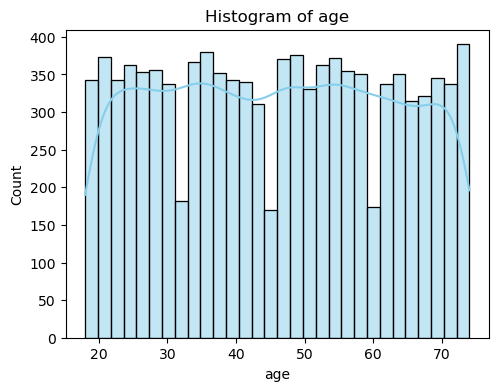

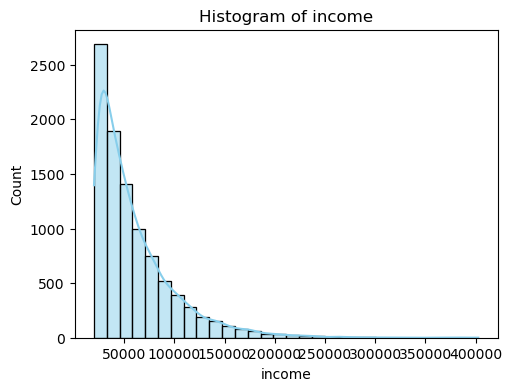

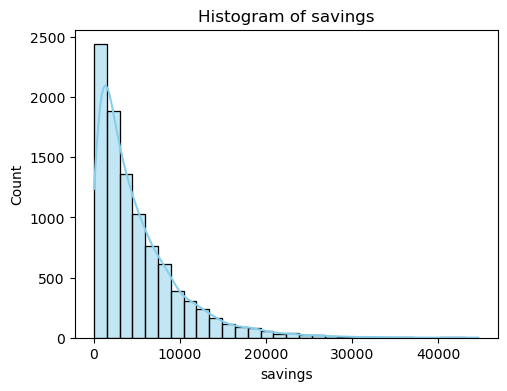

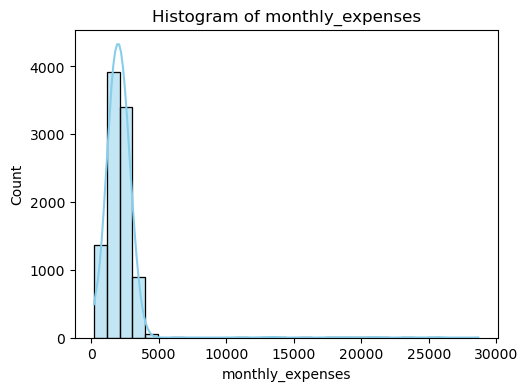

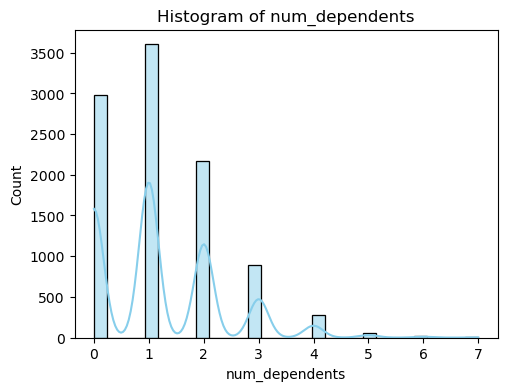

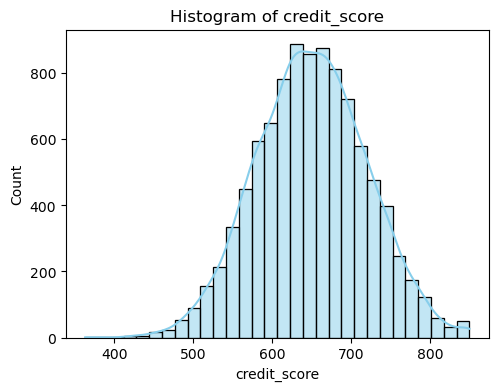

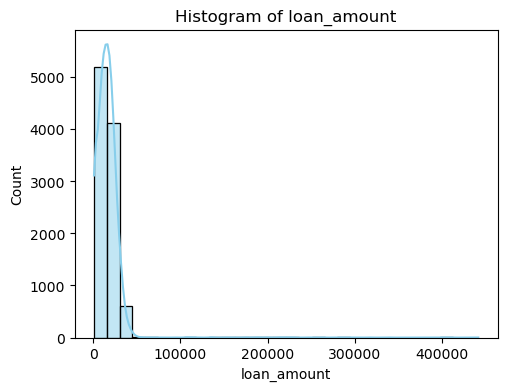

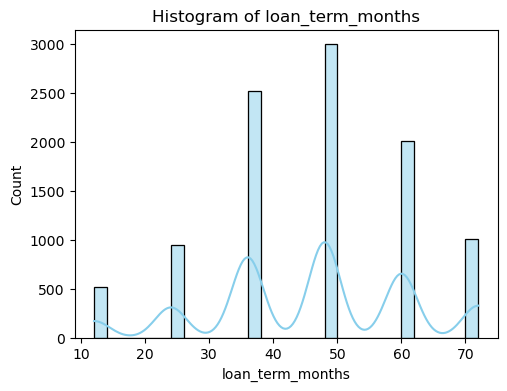

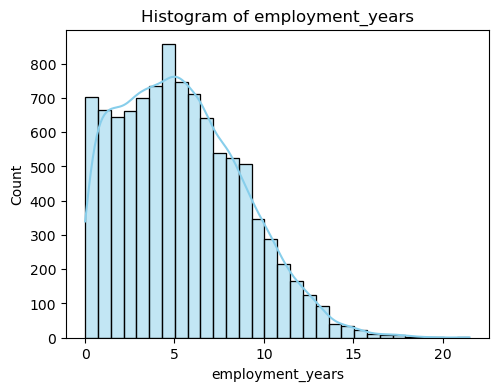

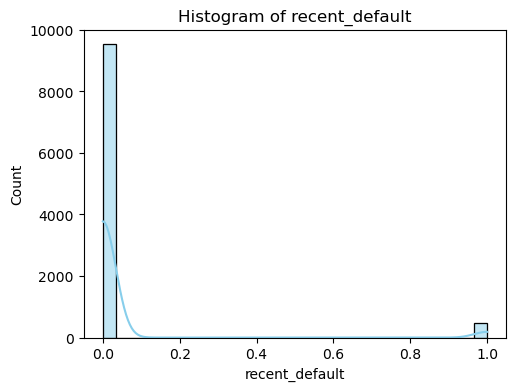

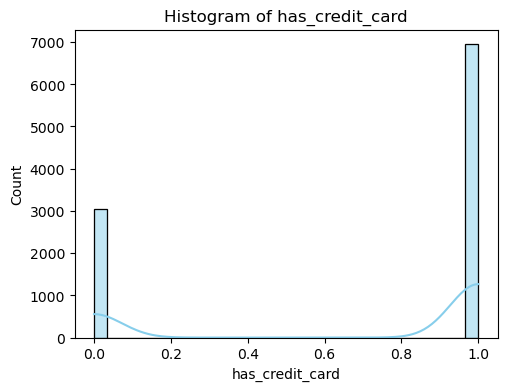

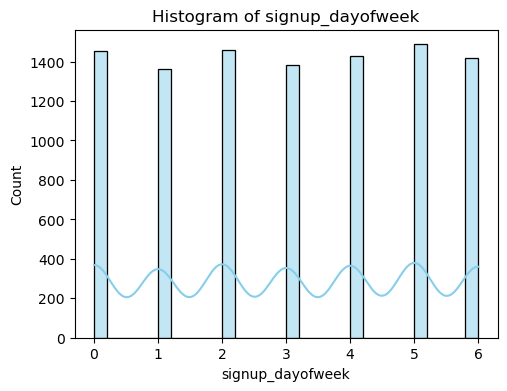

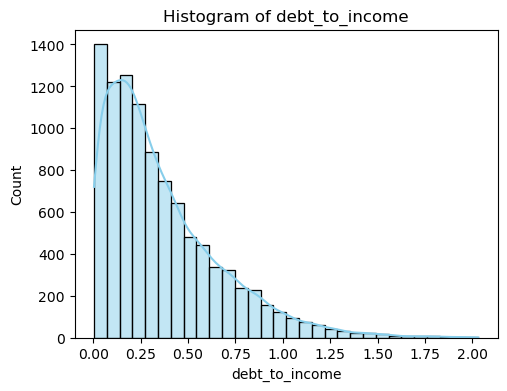

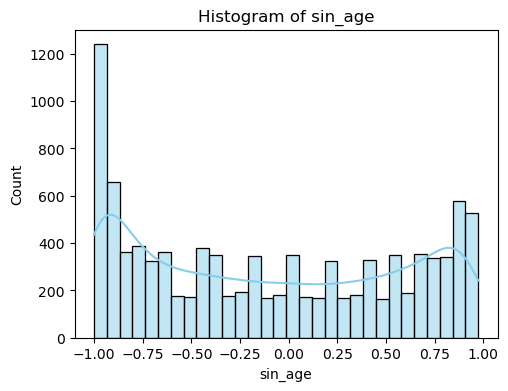

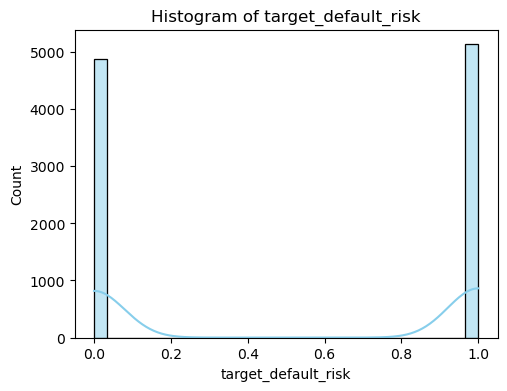

In [7]:
#distributions
numeric_data=data.select_dtypes(include=['int64','float64'])
for col in numeric_data.columns:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numeric_data[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Histogram of {col}")

above we constructed the histplot on numerical data and we can know that there were very less to see that many of the columns are not positively skewed
and the distributions are very unnatural

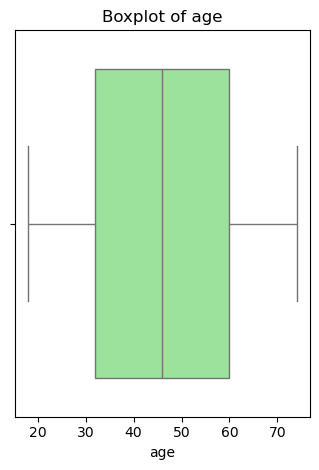

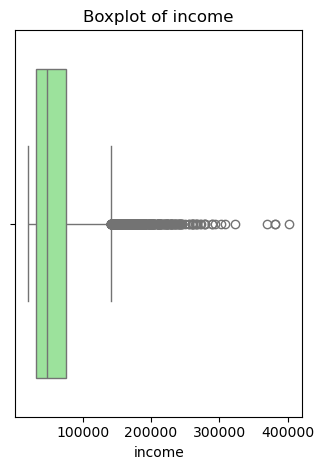

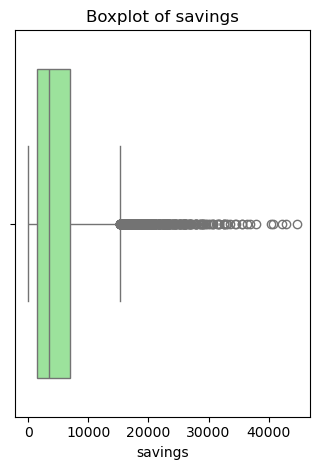

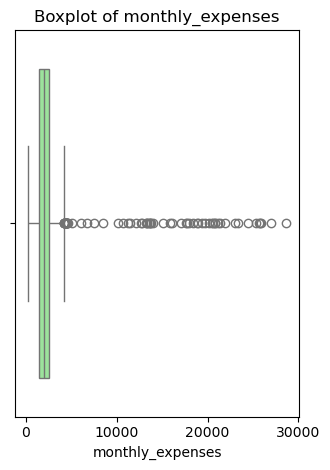

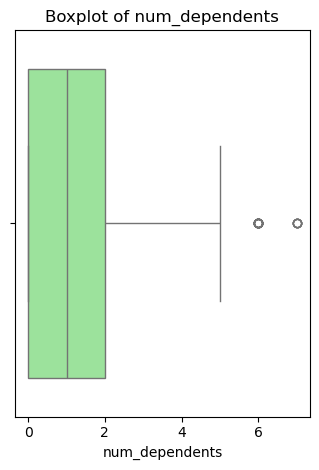

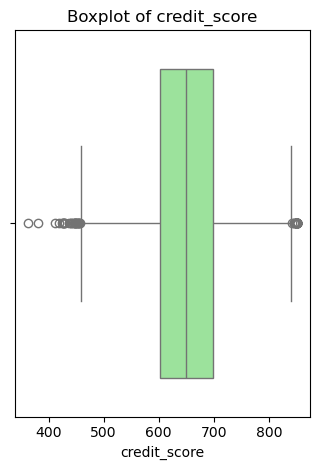

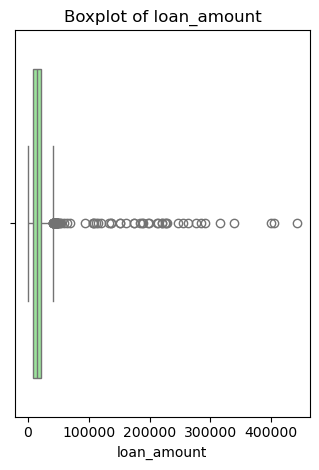

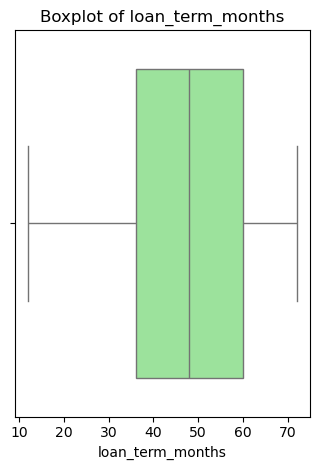

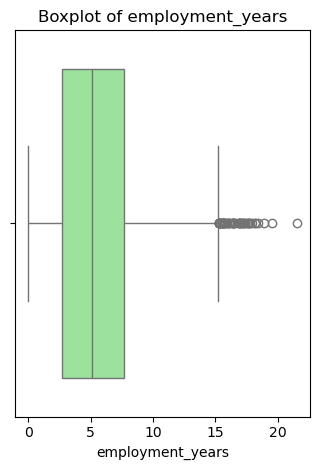

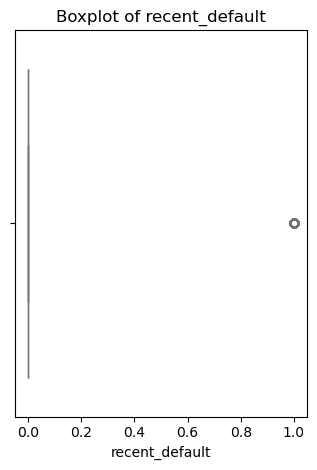

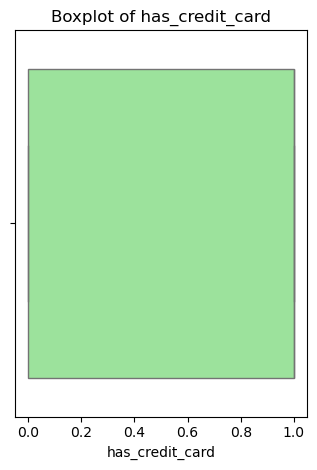

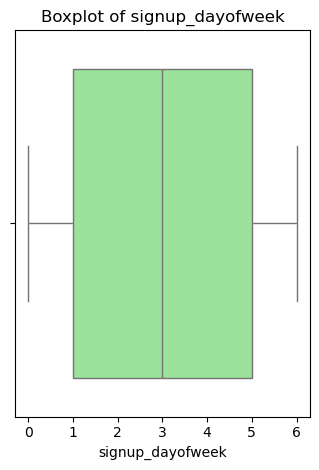

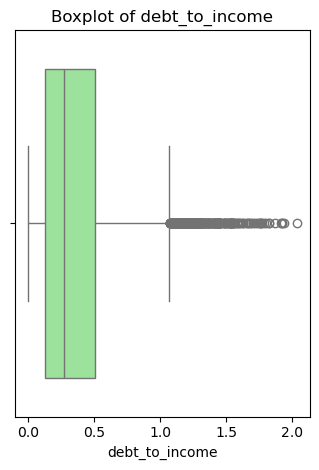

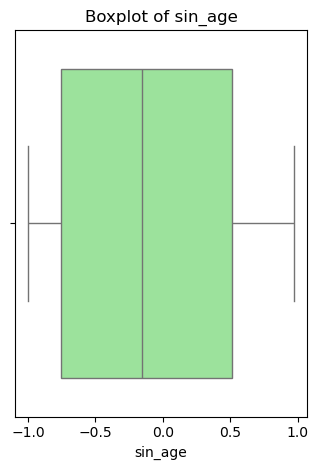

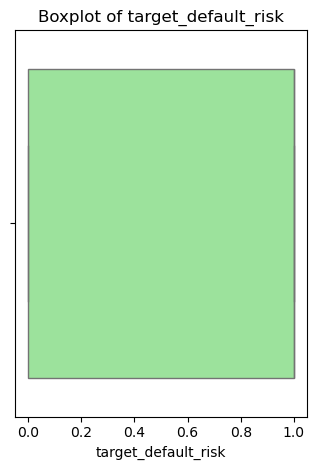

In [8]:
# Boxplot
for col in numeric_data.columns:
    plt.subplot(1, 2, 2)
    sns.boxplot(x=numeric_data[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()

from the box plot we can tell you the min max median q1,q2,q3 and many more, as you can see that the data is with lots of outlier
which are going to be removed in the next cells

In [9]:
categorical_data=data.select_dtypes('object')
categorical_data.head()

customer_id home_ownership  education marital_status region signup_date
0  CUST006253           RENT         HS         Single   West  2020-07-05
1  CUST004685           RENT  Bachelors        Married   East  2018-10-03
2  CUST001732            OWN  Bachelors         Single   East  2018-05-30
3  CUST004743            OWN         HS        Married  South  2018-04-22
4  CUST004522       MORTGAGE    Masters         Single   West  2019-12-03

THE COUNT PLOT shows the data distributions in several formats and we can get each categorical data how it is distributed through each aspect

home_ownership
RENT        4524
OWN         2526
MORTGAGE    2498
OTHER        452
Name: count, dtype: int64


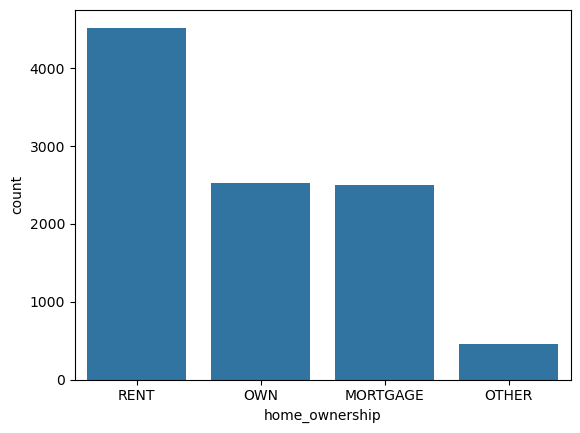

In [10]:
sns.countplot(x=categorical_data['home_ownership'],data=categorical_data)
print(categorical_data['home_ownership'].value_counts())

education
Bachelors    4443
HS           2546
Masters      1962
Other         500
PhD           462
Bachlors       87
Name: count, dtype: int64


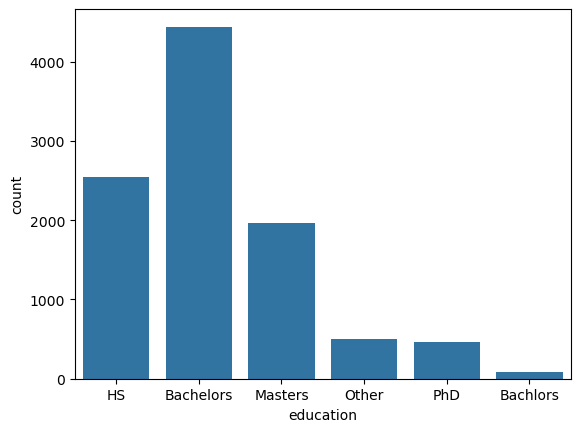

In [11]:
sns.countplot(x=categorical_data['education'],data=categorical_data)
print(categorical_data['education'].value_counts())

marital_status
Single      4486
Married     4002
Divorced    1000
Widowed      512
Name: count, dtype: int64


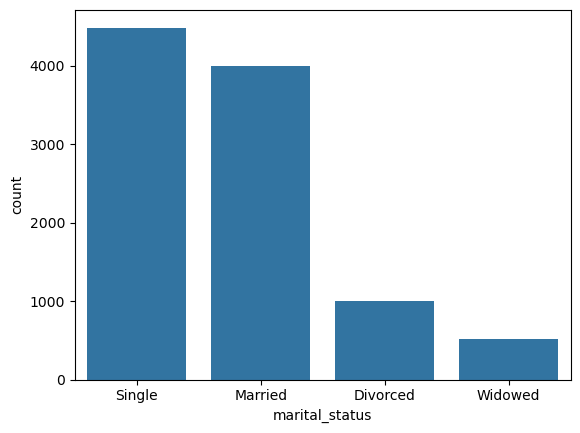

In [12]:
sns.countplot(x=categorical_data['marital_status'],data=categorical_data)
print(categorical_data['marital_status'].value_counts())

# Outliers

In [13]:
numeric_data.describe()

age         income       savings  monthly_expenses  \
count  10000.000000    9682.000000   9689.000000       9675.000000   
mean      45.861600   59712.871411   5039.922489       2082.209612   
std       16.457987   39865.231489   5041.793583       1385.991787   
min       18.000000   20001.000000      0.000000        200.000000   
25%       32.000000   31300.500000   1476.000000       1471.000000   
50%       46.000000   47301.500000   3499.000000       2007.000000   
75%       60.000000   75164.250000   6986.000000       2557.000000   
max       74.000000  402769.000000  44644.000000      28664.000000   

       num_dependents  credit_score    loan_amount  loan_term_months  \
count    10000.000000   9674.000000   10000.000000      10000.000000   
mean         1.214200    650.155438   16214.796900         45.642000   
std          1.108982     69.918297   16081.646814         15.475134   
min          0.000000    363.077116    1000.000000         12.000000   
25%          0.000000    602.189895    8508.500000         36.000000   
50%          1.000000    649.808322   15174.500000         48.000000   
75%          2.000000    697.537432   21843.750000         60.000000   
max          7.000000    850.000000  441190.000000         72.000000   

       employment_years  recent_default  has_credit_card  signup_dayofweek  \
count       10000.00000    10000.000000     10000.000000      10000.000000   
mean            5.39701        0.047000         0.694800          3.011900   
std             3.41370        0.211649         0.460515          2.003986   
min             0.00000        0.000000         0.000000          0.000000   
25%             2.70000        0.000000         0.000000          1.000000   
50%             5.10000        0.000000         1.000000          3.000000   
75%             7.70000        0.000000         1.000000          5.000000   
max            21.50000        1.000000         1.000000          6.000000   

       debt_to_income       sin_age  target_default_risk  
count    10000.000000  10000.000000         10000.000000  
mean         0.358156     -0.100387             0.513200  
std          0.302606      0.667428             0.499851  
min          0.004000     -0.999923             0.000000  
25%          0.132000     -0.756802             0.000000  
50%          0.275000     -0.157746             1.000000  
75%          0.508000      0.515501             1.000000  
max          2.031000      0.973848             1.000000

In [14]:
#IQR method
for col in numeric_data.columns:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q1-q3
    lower_bound=q1-1.5*IQR
    upper_bound=q1+1.5*IQR

In [15]:
outliers=((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
outliers
#outlier removing
data[col]=np.where(data[col]<lower_bound,lower_bound,
                  np.where(data[col]>upper_bound,upper_bound,data[col]))

i personally use the CAPPING method because of the more data we have the more we can get the information and ease of acces and good for mode building

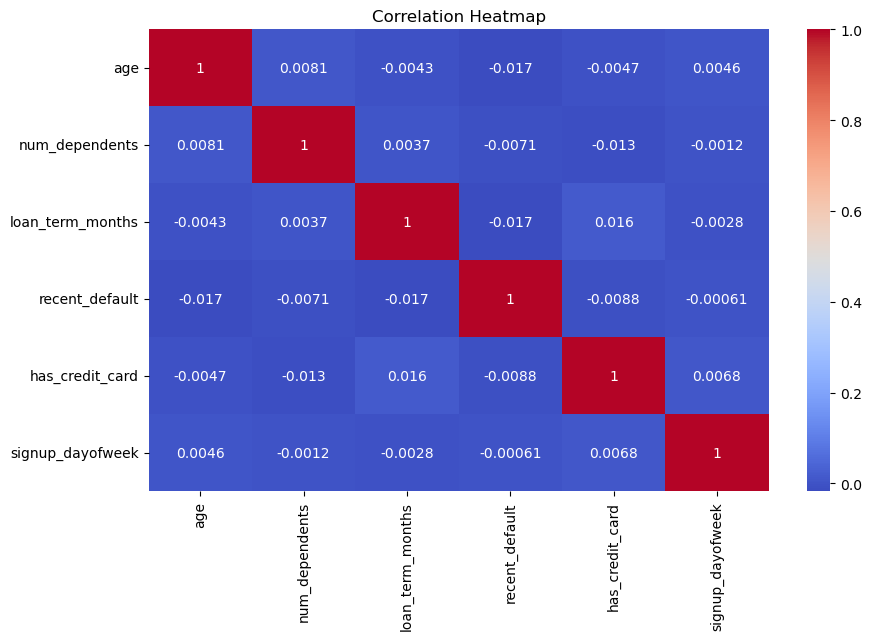

In [84]:
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include='int64').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

The Correlation map shows the relation between each features and itself if we see the data and the picture the only time the data was highly corelated was the relation having with itself only
and the relation with each other was not much stronger as it was classification data we can get these type of data normally

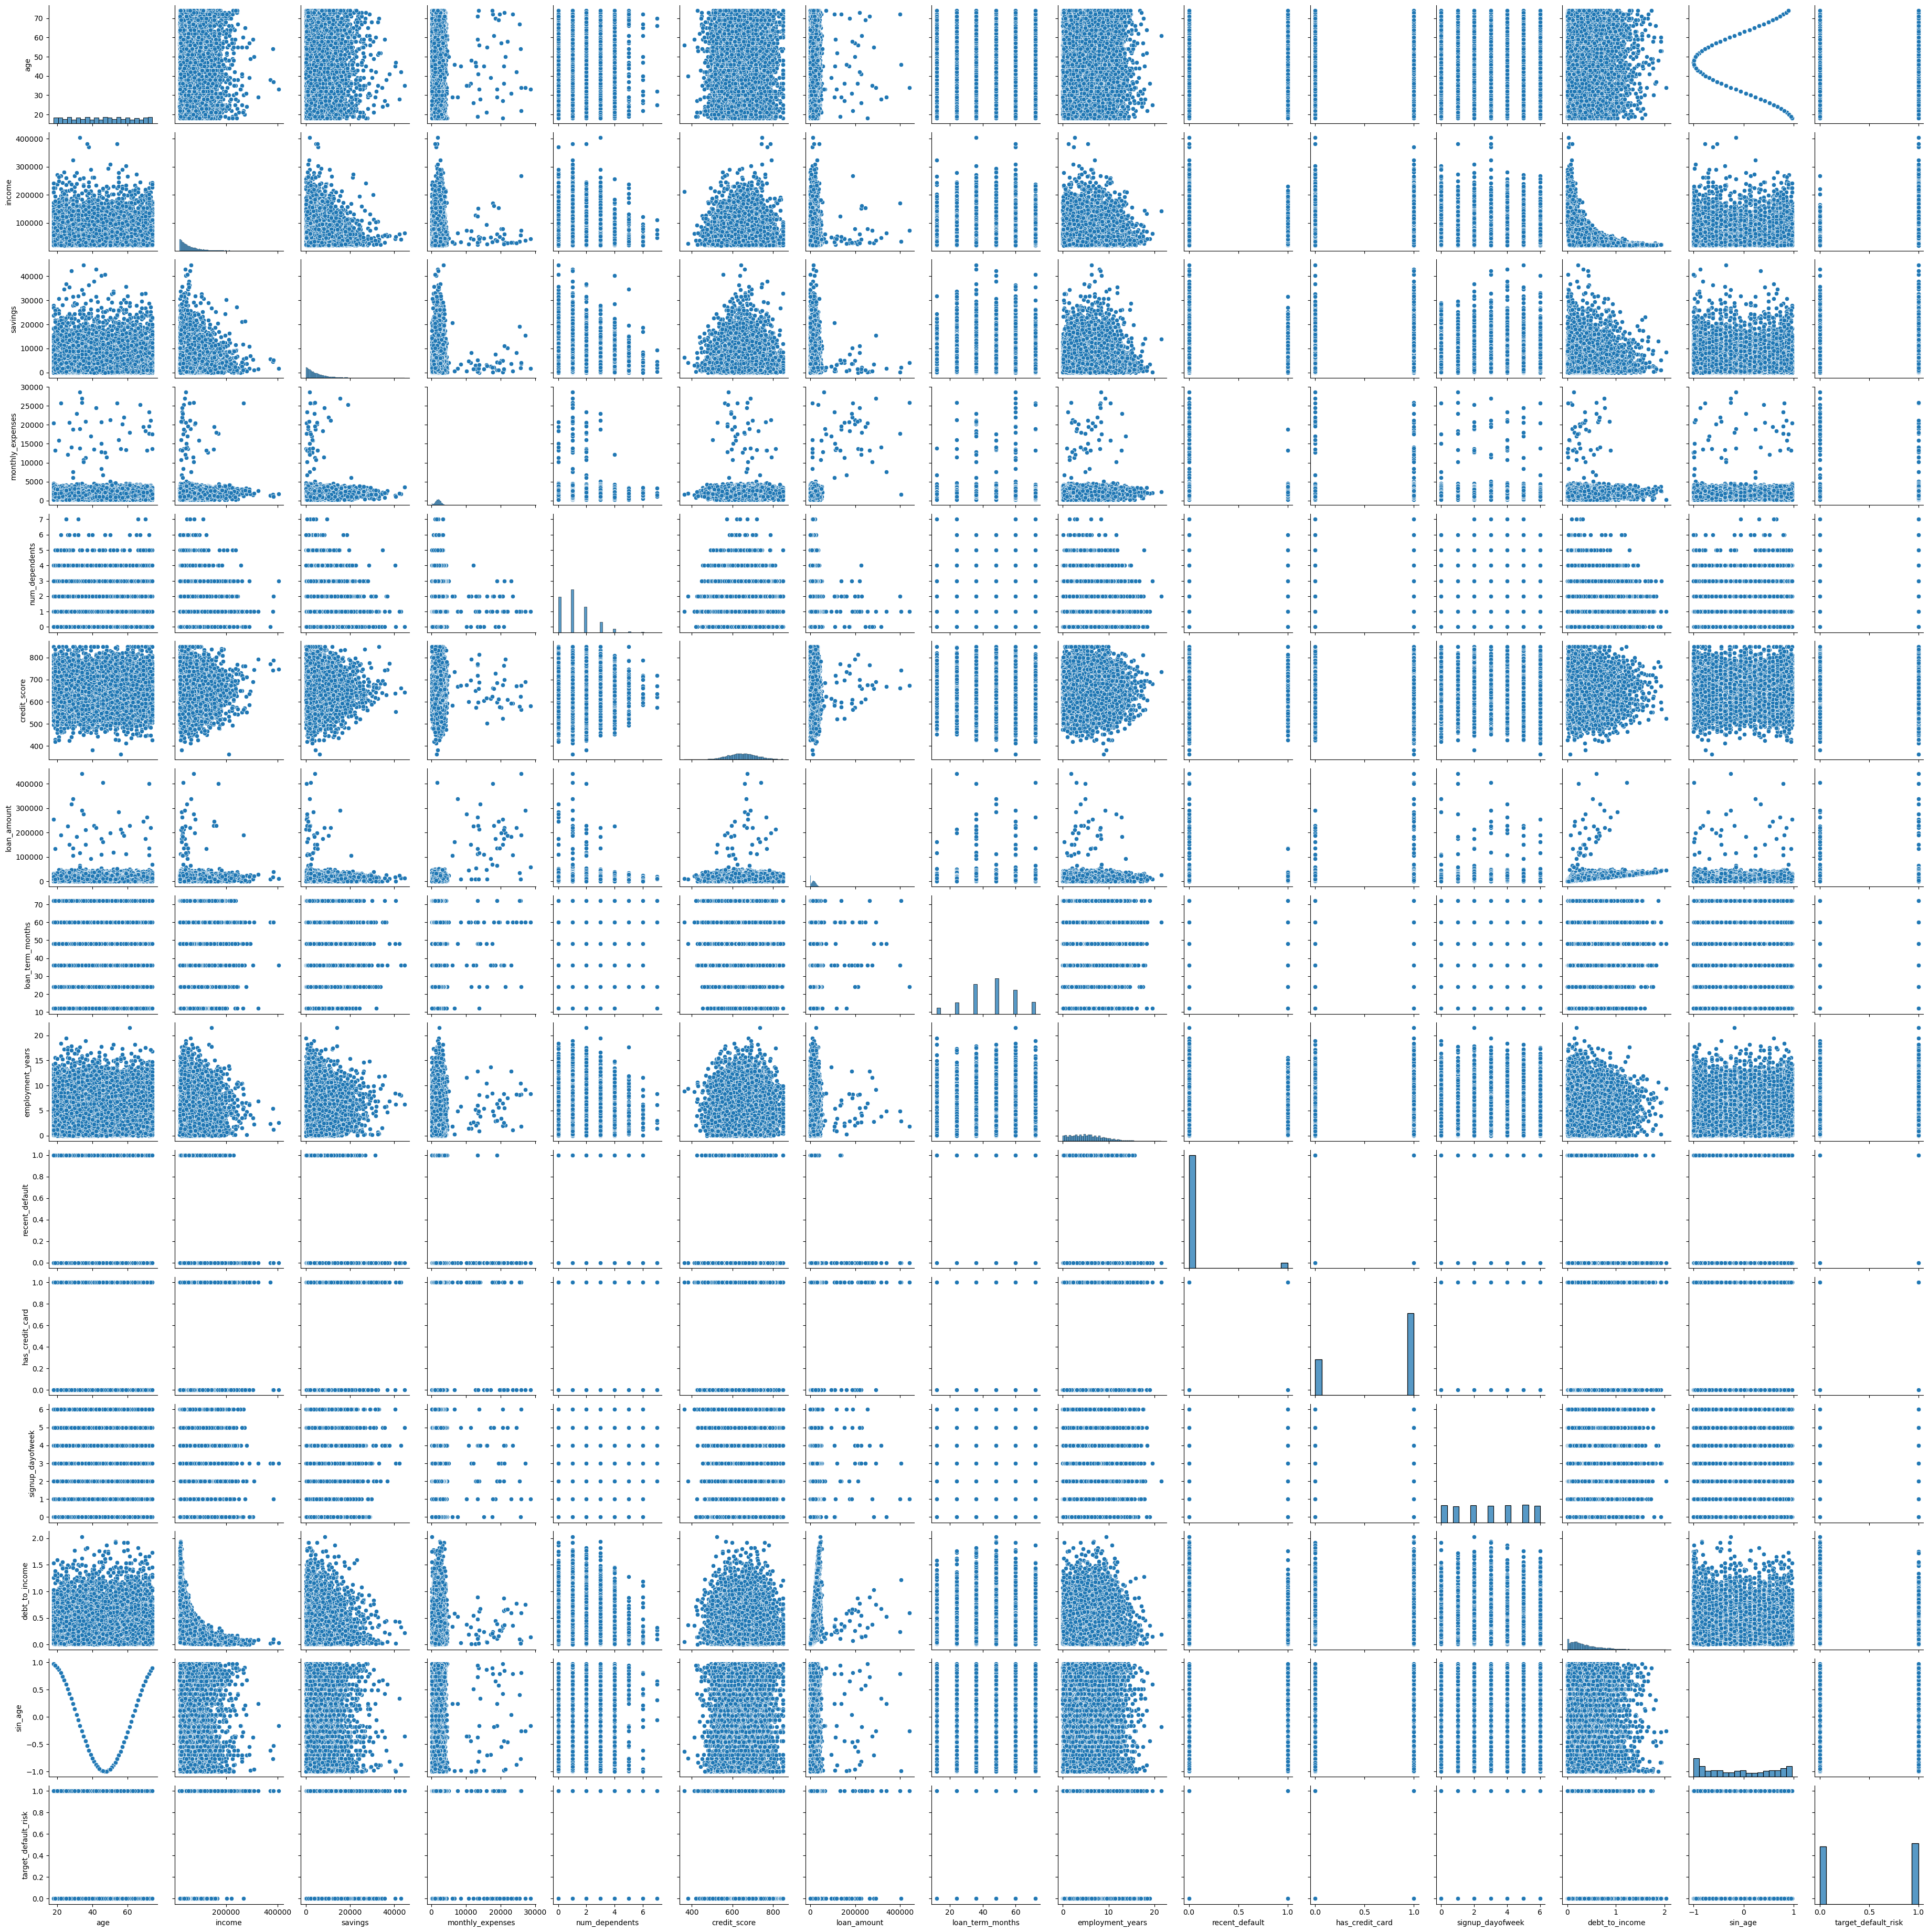

In [17]:
#pair plot
sns.pairplot(data=numeric_data)

The PAIRPLOT in the seaborn is a mixed of scatterplots,histogram,correlation between every cell in numerica datafrom which we can get every information which was given in the above cells


# task-2 data preprocessing

# Handling the missing data

In [16]:
categorical_data['education'].unique()

array(['HS', 'Bachelors', 'Masters', 'Other', 'PhD', 'Bachlors'],
      dtype=object)

In [17]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean') # we can also  get medain 

In [18]:
numerical_data=imputer.fit_transform(numeric_data)

In [19]:
numerical_data_si=pd.DataFrame(numerical_data,columns=imputer.get_feature_names_out())

In [20]:
numerical_data_si

age   income  savings  monthly_expenses  num_dependents  credit_score  \
0     30.0  66737.0  11155.0            2272.0             2.0    605.076204   
1     22.0  70740.0    997.0            1934.0             1.0    683.291967   
2     68.0  38890.0   1929.0            1696.0             0.0    658.003360   
3     49.0  29049.0   6284.0            2485.0             1.0    707.477864   
4     74.0  60063.0    924.0            3179.0             2.0    564.768511   
...    ...      ...      ...               ...             ...           ...   
9995  54.0  44507.0   5975.0            2520.0             1.0    699.633352   
9996  50.0  20651.0  10203.0            1020.0             3.0    680.774066   
9997  43.0  33827.0   3848.0            2562.0             1.0    655.562748   
9998  44.0  38273.0  18880.0            1060.0             2.0    653.277645   
9999  30.0  53614.0   6201.0            1310.0             1.0    663.975556   

      loan_amount  loan_term_months  employment_years  recent_default  \
0         26965.0              48.0               3.9             1.0   
1          4681.0              36.0               0.7             0.0   
2         12633.0              72.0               2.2             0.0   
3         20881.0              36.0               2.7             0.0   
4         19438.0              36.0              10.3             0.0   
...           ...               ...               ...             ...   
9995      31089.0              48.0               5.3             0.0   
9996       8977.0              60.0               9.6             0.0   
9997      24319.0              60.0               4.3             0.0   
9998       1000.0              24.0              11.4             0.0   
9999       5205.0              60.0               9.8             0.0   

      has_credit_card  signup_dayofweek  debt_to_income   sin_age  \
0                 1.0               6.0           0.404  0.141120   
1                 0.0               2.0           0.066  0.808496   
2                 1.0               2.0           0.325  0.494113   
3                 1.0               6.0           0.719 -0.982453   
4                 0.0               1.0           0.324  0.898708   
...               ...               ...             ...       ...   
9995              1.0               3.0           0.699 -0.772764   
9996              0.0               3.0           0.435 -0.958924   
9997              0.0               4.0           0.719 -0.916166   
9998              1.0               6.0           0.026 -0.951602   
9999              1.0               5.0           0.097  0.141120   

      target_default_risk  
0                     1.0  
1                     1.0  
2                     0.0  
3                     0.0  
4                     1.0  
...                   ...  
9995                  1.0  
9996                  0.0  
9997                  0.0  
9998                  0.0  
9999                  1.0  

[10000 rows x 15 columns]

from the above cells we can tell that we replaced all the null values in the dataset with simpleImputer as strategy we used mean 
by fitting the data and training it we get no null values in the data

In [21]:
education_map={
    "HS":"HS",
    "Bachlors":"Bachelors",
    "Bachelors":"Bachelors",
    "Masters":"Masters",
    "PhD":"PhD",
    "Other":"Other"
}
categorical_data['education']=categorical_data['education'].replace(education_map)


In [22]:
categorical_data['education'].unique()

array(['HS', 'Bachelors', 'Masters', 'Other', 'PhD'], dtype=object)

we get to know that there are some typos in the education feature column we replace it with the mapping and also we can do it with replace method but at the final we got the output clean as swe can see above

# Encode Categorical data

In [23]:
categorical_data

customer_id home_ownership  education marital_status region signup_date
0     CUST006253           RENT         HS         Single   West  2020-07-05
1     CUST004685           RENT  Bachelors        Married   East  2018-10-03
2     CUST001732            OWN  Bachelors         Single   East  2018-05-30
3     CUST004743            OWN         HS        Married  South  2018-04-22
4     CUST004522       MORTGAGE    Masters         Single   West  2019-12-03
...          ...            ...        ...            ...    ...         ...
9995  CUST005735           RENT         HS         Single   East  2020-02-27
9996  CUST005192           RENT        PhD       Divorced  North  2018-08-23
9997  CUST005391          OTHER         HS        Married   West  2019-01-18
9998  CUST000861       MORTGAGE      Other         Single  North  2019-08-04
9999  CUST007271           RENT  Bachelors       Divorced  North  2018-03-03

[10000 rows x 6 columns]

# Column Transformer

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [25]:
tranformer=ColumnTransformer(transformers=[
    ('encoder',OneHotEncoder(sparse_output=False,drop='first'),['home_ownership','marital_status','region']),
    ('enoder1',OrdinalEncoder(),['education'])
],remainder='passthrough')

In [35]:
categorical_data_transformed=tranformer.fit_transform(categorical_data)

ValueError: A given column is not a column of the dataframe

In [ ]:
categorical_data=pd.DataFrame(categorical_data_transformed,columns=tranformer.get_feature_names_out())
categorical_data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numerical_data=scaler.fit_transform(numerical_data)
numeric_col=pd.DataFrame(numerical_data,columns=['age', 'income', 'savings', 'monthly_expenses', 'num_dependents',
       'credit_score', 'loan_amount', 'loan_term_months', 'employment_years',
       'recent_default', 'has_credit_card', 'signup_dayofweek',
       'debt_to_income', 'sin_age', 'target_default_risk'])
numeric_col

In [ ]:
data=pd.concat([categorical_data,numeric_col],axis=1)
data.info()

After the Column Transfering with the One_Hot_encoder and theOrdinal_encoder the data was turned into 0's ans 1's so that the machine can undrstand the data
after the encoding of categorical data i also encoded the numerical data by using the Min_Max_Scaler the data has turned into small numbers with similar werights
so that the caluculations are easy to done in less time, after the data transfer the data was combined into one data frame 

# Data Spliting

In [ ]:
x=data.drop(columns=['remainder__customer_id','remainder__signup_date','target_default_risk'],axis=1)
y=data['target_default_risk']

Since the data want to be trained the data was trainned into two was one is using the Train Test split finction and the Second one is with Cross validation 

# Logestic Regression

In [41]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=3)
cv=StratifiedKFold(n_splits=4)
score=cross_val_score(lr,x,y,scoring='accuracy',cv=cv)
lr.fit(x_train,y_train)
y_hat_lr=lr.predict(x_test)
print('The train test split accuracy score:',accuracy_score(y_hat_lr,y_test))

NameError: name 'accuracy_score' is not defined

In [ ]:
print('The Cross Validation Accuracy scores:',score)
print('The Cross Validation mean Accuracy score:',score.mean())

In [ ]:
the above technique is the Logistic Regreesion it makes the data classifies into two parts with an specific accuracy so the data can be divided into two parts based on the 

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=7,criterion='entropy',random_state=42,)

In [ ]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
score=cross_val_score(dtc,x,y,scoring='f1',cv=cv)
dtc.fit(x_train,y_train)
y_hat_dtc=dtc.predict(x_test)
print('The train test split Accuracy score:',accuracy_score(y_hat_dtc,y_test))

In [ ]:
print('The Cross Validation accuracy of decision tree:',score)
print('The Cross Validation Mean of the scores:',score.mean())

# Support Vector Machine

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
svm=SVC(kernel='rbf',gamma=0.001,C=100,probability=True)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score
print('accuracy for the svm is :',accuracy_score(y_pred,y_test))

accuracy for the svm is : 0.9045


# Random Forest → ~96%

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=400,     # more trees = better stability
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
rf.fit(x_train,y_train)
y_hat=rf.predict(x_test)
from sklearn.metrics import accuracy_score

print('the accuracy score of the random forest:',accuracy_score(y_hat,y_test))

the accuracy score of the random forest: 0.941


# - XGBoost → ~98

In [101]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold


# Split into features & target
x=data.drop(columns=['remainder__customer_id','remainder__signup_date','target_default_risk'],axis=1)
y=data['target_default_risk']
x = x.astype(float)   # convert all to float


# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# XGBoost model
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss",
)

# Train
xgb.fit(x_train, y_train)
y_hat=xgb.predict(x_test)
accuracy_score(y_hat,y_test)

0.9635

# MLP CLassifier

In [43]:
from sklearn.neural_network import MLPClassifier
mlp_cls=MLPClassifier(hidden_layer_sizes=(33,10,60,28,40),activation='relu',solver='adam',max_iter=1000,random_state=40)

mlp_cls.fit(x_train,y_train)
y_hat=mlp_cls.predict(x_test)
accuracy_score(y_hat,y_test)

0.9335

In [100]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
score=cross_val_score(mlp_cls,x,y,scoring='accuracy',cv=cv)
score

array([0.93  , 0.9285, 0.933 , 0.921 , 0.9305])